# Voraussetzung: Packages installieren

In [1]:
%pip install -r req_SVM.txt

Note: you may need to restart the kernel to use updated packages.


# 1. Bibliotheken importieren

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# 2. Daten laden

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 

# 3. Daten bereinigen

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

# 4. Kategorische Daten in Zahlen umwandeln

In [5]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Features und Zielvariable

In [6]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# 6. Daten aufteilen

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Standardisierung (wichtig für SVM)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. SVM-Modell trainieren

In [9]:
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

# 9. Vorhersage

In [10]:
y_pred = svm_model.predict(X_test_scaled)

# 10. Evaluation

In [11]:
print("📊 Bewertung – Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nKlassifikationsbericht:\n", classification_report(y_test, y_pred))

📊 Bewertung – Support Vector Machine:
Accuracy: 0.7910447761194029
Precision: 0.6526717557251909
Recall: 0.4572192513368984
F1-Score: 0.5377358490566038

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.65      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



# 11. Konfusionsmatrix

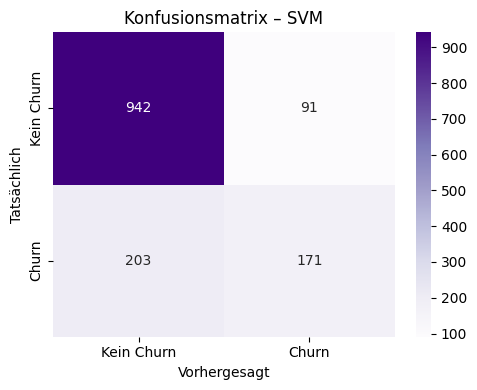

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Kein Churn", "Churn"], yticklabels=["Kein Churn", "Churn"])
plt.title("Konfusionsmatrix – SVM")
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.tight_layout()
plt.show()